### Fast Fourier Transformation 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path



data size 52800000


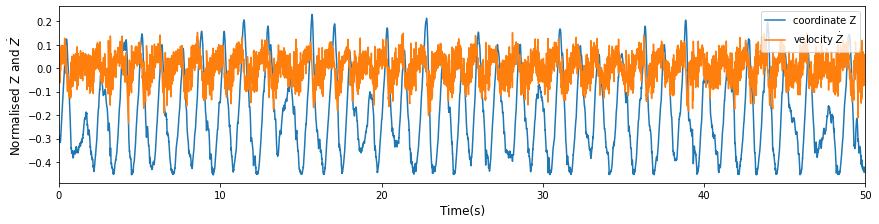

In [2]:
def denoise(f, cutoff):
    dt = 0.0025
    t = np.arange(0,50,dt)

    # Compute the Fast Fourier Transformation (FFT)
    n = len(t)                     
    fhat = np.fft.fft(f,n)         # Compute the FFT
    PSD = fhat*np.conj(fhat)/n     # Power spectrum (power per frequency)
    freq = (1/(dt*n))*np.arange(n) # Create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')  # Only plot the first half of 
    

    # Use the PSD to filter out noise
    indices = PSD > cutoff
    PSDclean = PSD*indices
    fhat = indices*fhat
    ffilt = np.fft.ifft(fhat)
    
    return(t,freq,L,PSDclean, ffilt)

def readFile(fin):
    data = []
    with open(fin) as f:
        for line in f:
            if(line.split()[0] == 'TIME'):
                t = line.split()[2]
#                 print(t)
            else:
                data.append(float(t))
                tup = line.split()
                data.append(float(tup[0]))
                data.append(float(tup[1]))
                data.append(float(tup[2]))
                data.append(float(tup[3]))
                data.append(float(tup[4]))
                data.append(float(tup[5]))
                data.append(float(tup[6]))
                data.append(float(tup[7]))
                data.append(float(tup[8]))
                data.append(int(tup[9]))
    return np.array(data)
                
dir = "C:/Users/Chandana Jaysundara/Documents/mill/test_code_new/254mm/25.4mm/0.3J/0.5N"
fin = os.path.join(dir, 'particle.dat')

data = readFile(fin)
print("data size", len(data))

# Number of columns in data file = 11
data = data.reshape(4800000,11)
df = pd.DataFrame(data, columns=['t','x','y','z','velx','vely','velz', 'dia,', 'col','col2','p'])

# Select particle
select = df['p'] == 0 
df = df[select]

# Mill diameter
mill_dia = 254.0e-3

r = 0.5*mill_dia #(m)
omega = 44.3 # (rad/sec)
tipVel = r*omega  # (r*omega)

fig = plt.figure(figsize=(16,3.5))
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.set_xlim(0,50)
ax.set_xlabel('Time(s)', size=12)
ax.set_ylabel('Normalised Z and $\dot{Z}$', size=12)
ax.plot(df['t'],df['z']*1e-3/(2*r), label='coordinate Z')
ax.plot(df['t'],df['velz']/tipVel, label='velocity $\dot{Z}$')
lg = plt.legend(loc='best')


# fig = plt.figure(figsize=(12,4.5))
# ax = fig.add_axes([0.2,0.2,0.7,0.7])
# ax.set_xlim(0,50)
# ax.set_xlabel('cycle')
# ax.set_ylabel('Normalised value')
# ax.plot(df['t'],df['z']*1e-3/(2*r), label='Z')
# ax.plot(df['t'],df['velz']/tipVel, label='velZ')
# lg = plt.legend(loc='best')

# fig = plt.figure(figsize=(12,4.5))
# ax = fig.add_axes([0.2,0.2,0.7,0.7])
# ax.set_xlim(0,50)
# ax.xlabel('cycle')
# ax.ylabel('Normalised value')
# ax.plot(df['t'],df['y']*1e-3/(2*r), label='Y')
# ax.plot(df['t'],df['vely']/tipVel, label='velY')
# lg = plt.legend(loc='best')

fout = os.path.join(dir, "pic/norm_velZ_vs_time.jpg")
fig.savefig(fout, dpi=600)







<ipython-input-3-7d575123b46c>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,ffilt,LineWidth=1, label='Unfiltered', alpha=0.4)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-3-7d575123b46c>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,ffilt1,LineWidth=2, label='Filtered-4Hz')
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-3-7d575123b46c>:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor 

polar (0.002189793995840819, -3.1415926535897922)
real -0.002189793995840819
imag -1.9539925233402756e-18
0.002189793995840819
abs 0.009934882882298834
<class 'numpy.ndarray'>
data size 9999
data size 9999


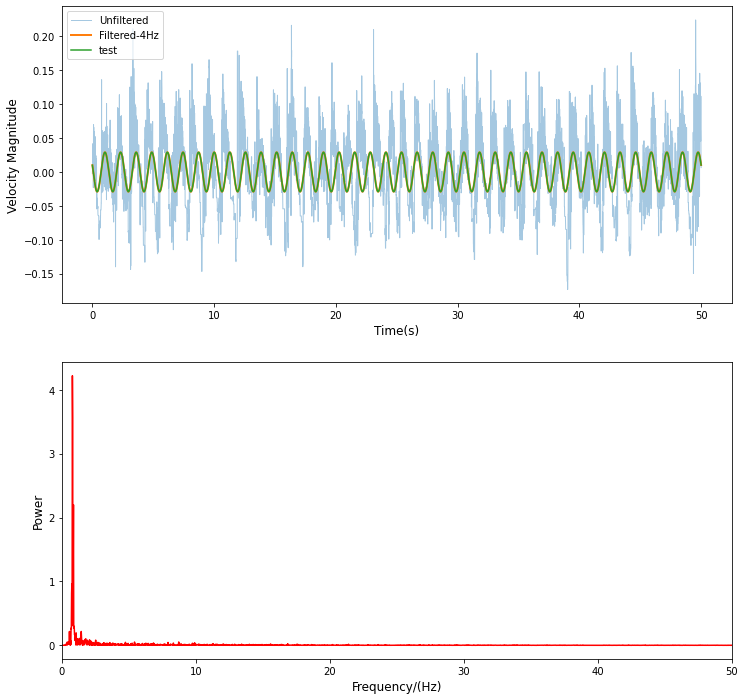

DONE


In [3]:
import cmath

# Plots
fig,axs = plt.subplots(2,1, figsize=(12,12))

plt.sca(axs[0])
plt.xlabel('Time(s)', size=12)
plt.ylabel('Velocity Magnitude', size=12)
(t,freq0,L,PSDclean0, ffilt)= denoise(df['velx']/tipVel, 0)
plt.plot(t,ffilt,LineWidth=1, label='Unfiltered', alpha=0.4)


# set cutoff frequency
cutoff = 4
(t,freq0,L,PSDclean1, ffilt1)= denoise(df['velx']/tipVel, cutoff)
plt.plot(t,ffilt1,LineWidth=2, label='Filtered-4Hz')

plt.plot(t,ffilt1.real, label='test')

noise1 = ffilt-ffilt1
print('polar',cmath.polar(ffilt[0]))
print('real',ffilt[0].real)
print('imag',ffilt[0].imag)
print(np.sqrt(ffilt[0].real**2+ffilt[0].imag**2))
print('abs',np.absolute(ffilt1[0]))


# print(type(noise1.real))
print(type(ffilt))

lg = plt.legend(loc='best')


plt.sca(axs[1])

plt.xlabel('Frequency/(Hz)', size=12)
plt.ylabel('Power', size=12)
plt.plot(freq0[L], PSDclean0[L], color='r',LineWidth=1.5, label='Noisy')
# plt.xlim(freq0[L[0]],freq0[L[-1]])
# plt.ylim(0,5)
plt.xlim(0,50)

print('data size',len(freq0[L]))
print('data size',len(PSDclean0[L]))


# lg = plt.legend(loc='best')
plt.show()

vel_data = {'t':df['t'],'x':df['x'],'y':df['y'],'z':df['z'], 'velX':ffilt1.real}

fout = os.path.join(dir, 'particle_velocity.csv')
df_out = pd.DataFrame(vel_data)
df_out.to_csv(fout)


# path = "E:/mill/Paper/pics"
# fout = os.path.join(path, "velocity_0.5J_0.6N.jpg")
# fig.savefig(fout, dpi=300)

print('DONE')